### **Autoencoders**

**An Autoencoder consists of two component, one is encoder and other is a decoder.** 

* An encoder network that compresses high-dimensional input data into a lower-dimensional representation vector
* A decoder network that decompresses a given representation vector back to the original domain

The network is trained to find weights for the encoder and decoder that minimize the loss between the original input and the reconstruction of the input after it has passed through the encoder and decoder.

The representation vector is a compression of the original image into a lower-dimensional, latent space. The idea is that by choosing any point in the latent space, we should be able to generate novel images by passing this point through the decoder, since the decoder has learned how to convert points in the latent space into viable images.

**Autoencoders for Noise removal**

Autoencoders can also be used to clean noisy images, since the encoder learns that it is not useful to capture the position of the random noise inside the latent space. For tasks such as this, a 2D latent space is probably too small to encode sufficient relevant information from the input. However, as we shall see, increasing the dimensionality of the latent space quickly leads to problems if we want to use the autoencoder as a generative model.

In [1]:
import os
from utils.loaders import load_mnist
from AE import Autoencoder
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

from utils.loaders import load_mnist, load_model

In [2]:
# run params
SECTION = 'ae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

 #'load' #

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [4]:
MODE =  'build'
AE = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [5]:
AE.encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0     

In [6]:
AE.decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0   

In [7]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [8]:
AE.compile(LEARNING_RATE)

In [10]:
AE.train(     
    x_train[:2000]
    , batch_size = BATCH_SIZE
    , epochs = 200
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
61/63 [============================>.] - ETA: 0s - loss: 0.1291
Epoch 00001: saving model to run/ae/0001_digits/weights/weights.h5
63/63 [==============================] - 1s 19ms/step - loss: 0.1277 - lr: 5.0000e-04
Epoch 2/200
61/63 [============================>.] - ETA: 0s - loss: 0.0628
Epoch 00002: saving model to run/ae/0001_digits/weights/weights.h5
63/63 [==============================] - 1s 19ms/step - loss: 0.0628 - lr: 5.0000e-04
Epoch 3/200
61/63 [============================>.] - ETA: 0s - loss: 0.0569
Epoch 00003: saving model to run/ae/0001_digits/weights/weights.h5
63/63 [==============================] - 1s 19ms/step - loss: 0.0569 - lr: 5.0000e-04
Epoch 4/200
61/63 [============================>.] - ETA: 0s - loss: 0.0555
Epoch 00004: saving model to run/ae/0001_digits/weights/weights.h5
63/63 [==============================] - 1s 20ms/step - loss: 0.0555 - lr: 5.0000e-04
Epoch 5/200
61/63 [============================>.] - ETA: 0s - loss: 0.0547
Epoch 00

In [9]:
AE = load_model(Autoencoder, RUN_FOLDER)

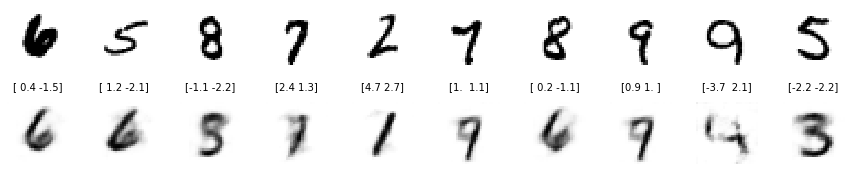

In [15]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

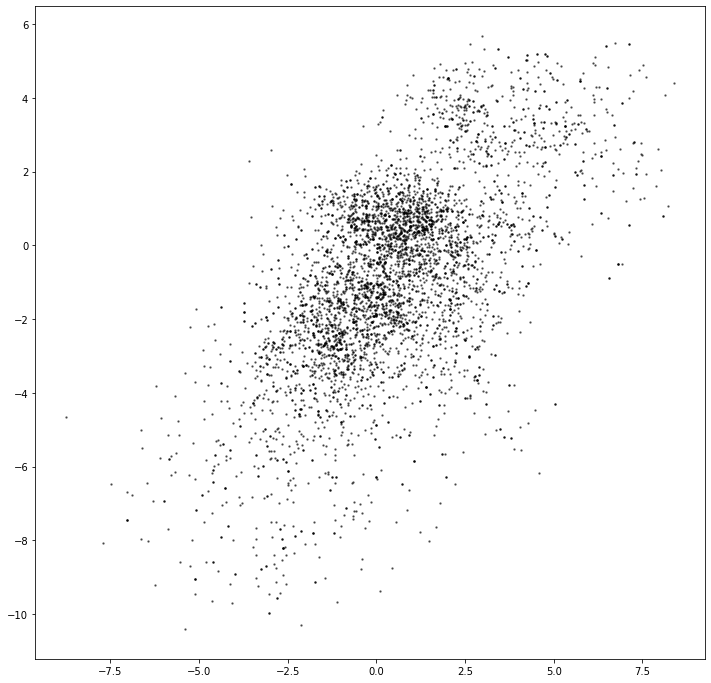

In [16]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

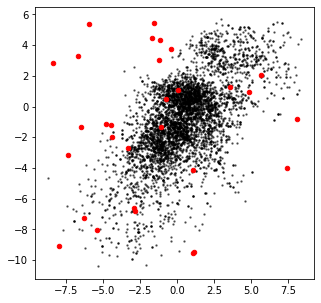

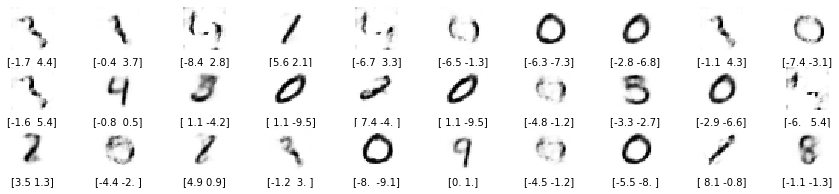

In [17]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

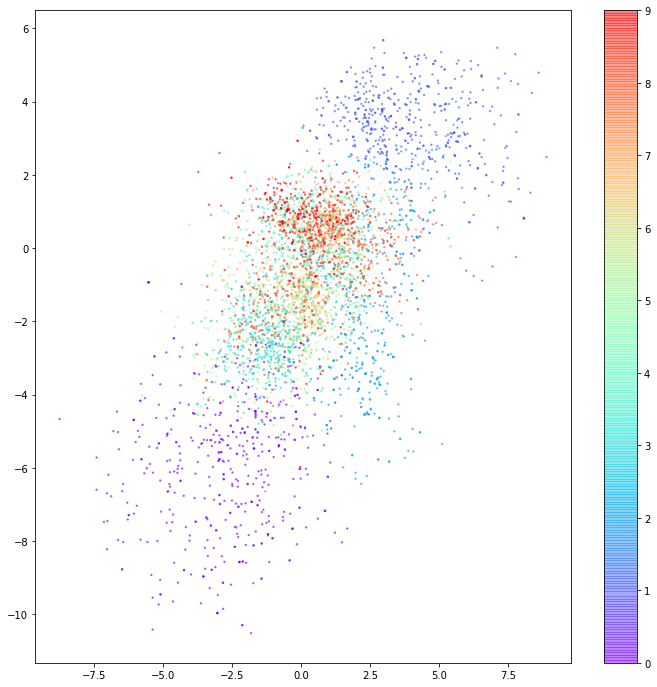

In [18]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.show()

There are a few interesting points to note:
1. The plot is not symmetrical about the point (0, 0), or bounded. For example, there are far more points with negative y-axis values than positive, and some points even extend to a y-axis value of < –10.
2. Some digits are represented over a very small area and others over a much larger area.
3. There are large gaps between colors containing few points.

Point 1 explains why it’s not obvious how we should even go about choosing a random point in the latent space, since the distribution of these points is undefined. Technically, we would be justified in choosing any point in the 2D plane! It’s not even guaranteed that points will be centered around (0,0). This makes sampling from our latent space extremely problematic.

Point 2 explains the lack of diversity in the generated images. Ideally, we’d like to obtain a roughly equal spread of digits when sampling randomly from our latent space. However, with an autoencoder this is not guaranteed. For example, the area of 1’s is far bigger than the area for 8’s, so when we pick points randomly in the space, we’re more likely to sample something that decodes to look like a 1 than an 8.

Point 3 explains why some generated images are poorly formed.

Partly, this is because of the large spaces at the edge of the domain where there are few points—the autoencoder has no reason to ensure that points here are decoded to legible digits as very few images are encoded here. However, more worryingly, even points that are right in the middle of the domain may not be decoded into well-formed images. This is because the autoencoder is not forced to ensure that the space is continuous. For example, even though the point (2, –2) might be decoded to give a satisfactory image of a 4, there is no mechanism in place to ensure that the point (2.1, –2.1) also produces a satisfactory 4.

In 2D this issue is subtle; the autoencoder only has a small number of dimensions to work with, so naturally it has to squash digit groups together, resulting in the space between digit groups being relatively small. However, as we start to use more dimensions in the latent space to generate more complex images, such as faces, this problem becomes even more apparent. If we give the autoencoder free rein in how it uses the latent space to encode images, there will be huge gaps between groups of similar points with no incentive for the space between to generate well-formed images.

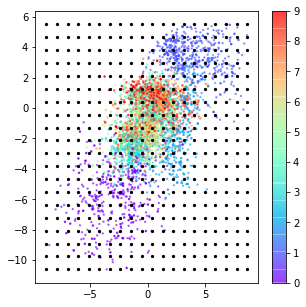

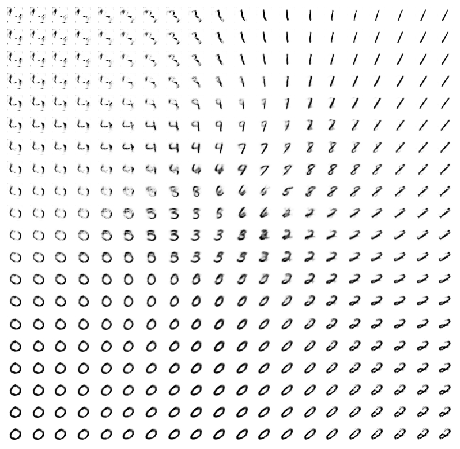

In [19]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)

plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

### **ENCODING X_TRAIN DIGITS**

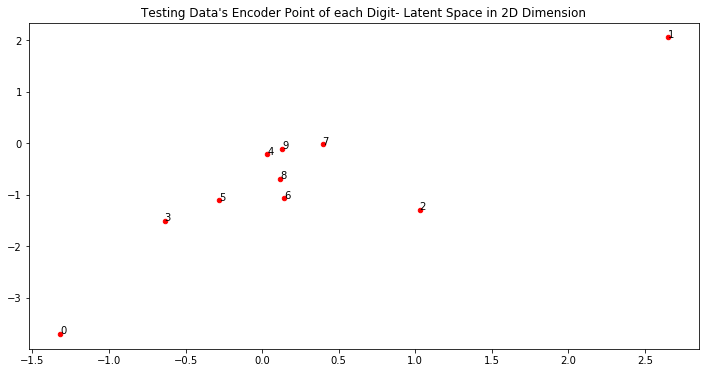

In [86]:
plt.figure(figsize=(12, 6))
for i in range(10):
    img_arr = x_test[np.where(y_test == i)[0]].mean(axis=0)
    addImg_dim = img_arr[None,:]
    z_points = AE.encoder.predict(addImg_dim)
    plt.scatter(z_points[:, 0] , z_points[:, 1], c = 'red', alpha=1, s=20)
    plt.annotate(str(i), (z_points[:, 0] , z_points[:, 1]))
plt.title("Testing Data's Encoder Point of each Digit- Latent Space in 2D Dimension")
plt.show()

### **DECODING X_TRAIN DIGITS**

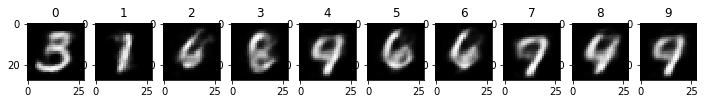

In [85]:
plt.figure(figsize=(12, 8))
for i in range(10):
    img_arr = x_test[np.where(y_test == i)[0]].mean(axis=0)
    addImg_dim = img_arr[None,:]
    z_points = AE.encoder.predict(addImg_dim)
    reconst = AE.decoder.predict(z_points)
    reconst = np.squeeze(reconst)
    plt.subplot(1, 10,i+1) 
    plt.imshow(reconst, cmap='gray')
    plt.title(str(i))